In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\91737\\Downloads\\kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.isnull().sum().sum()

1009

In [6]:
NumericalColumns = ['age','bp','al','su','bgr','bu','sc','sod','pot','hemo']
CategoricalColumns = ['rbc','sg','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']

In [7]:
df['classification'].replace("ckd\t","ckd",inplace=True)
df['dm'].replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
df['cad'].replace(["\tno"],["no"],inplace=True)
df['rc'].replace("\t?",np.nan, inplace=True)
df.wc.replace("\t?",np.nan, inplace=True)
df['pcv'].replace(["\t?","\t43"],np.nan, inplace=True)

In [8]:
for columnName in NumericalColumns:
  df[columnName].fillna(df[columnName].mean(), inplace=True)
for columnName in CategoricalColumns:
  df[columnName].fillna(df[columnName].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [10]:
encodeColumn = ['rbc','pc' ,'pcc' ,'ba' ,'htn' ,'dm' ,'cad' ,'appet' ,'pe' ,'ane']
df = pd.get_dummies(df , columns=encodeColumn , prefix=encodeColumn , drop_first=True)

In [11]:
df['classification'].replace(["ckd","notckd"],[1,0], inplace=True)

In [12]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,1,1,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,1,1,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,1,1,0,0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,1,0,1,0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,1,1,0,0,0,0,0,0,0,0


In [13]:
X = df.loc[:, df.columns != 'classification']
y = df['classification']

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(X)
X = min_max.transform(X)

In [15]:
from sklearn.model_selection import cross_val_score , train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score
x_train_lr_pred = lr.predict(X_train)
x_test_lr_pred = lr.predict(X_test)

print("Accuracy of Training with Logistic Regression = ", accuracy_score(y_train, x_train_lr_pred))
print("Accuracy of Testing with Logistic Regression = ", accuracy_score(y_test, x_test_lr_pred))

Accuracy of Training with Logistic Regression =  1.0
Accuracy of Testing with Logistic Regression =  0.9875


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
X_train_knn_pred = knn.predict(X_train)
X_test_knn_pred = knn.predict(X_test)

print("Accuracy of Training with K nearest neighbours = ", accuracy_score(y_train, X_train_knn_pred))
print("Accuracy of Testing with K nearest neighbours = ", accuracy_score(y_test, X_test_knn_pred))

Accuracy of Training with K nearest neighbours =  0.996875
Accuracy of Testing with K nearest neighbours =  0.9875


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
X_train_dt_pred = dt.predict(X_train)
X_test_dt_pred = dt.predict(X_test)

print("Accuracy of Training with Decision Tree Classifier = ", accuracy_score(y_train, X_train_dt_pred))
print("Accuracy of Testing with Decision Tree Classifier = ", accuracy_score(y_test, X_test_dt_pred))

Accuracy of Training with Decision Tree Classifier =  1.0
Accuracy of Testing with Decision Tree Classifier =  1.0


[Text(167.4, 163.07999999999998, 'X[0] <= 0.625\ngini = 0.472\nsamples = 320\nvalue = [122, 198]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 198\nvalue = [0, 198]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 122\nvalue = [122, 0]')]

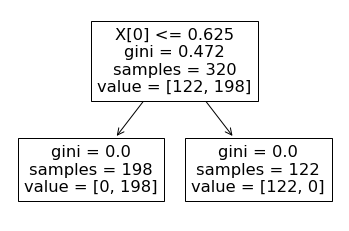

In [23]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [24]:
from sklearn.svm import SVC
svm_li=SVC(kernel='linear')
svm_po=SVC(kernel='poly')
svm_rbf=SVC(kernel='rbf')

In [25]:
svm_li.fit(X_train, y_train)
svm_po.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [26]:
li_train_pred=svm_li.predict(X_train)
li_test_pred=svm_li.predict(X_test)

In [27]:
po_train_pred=svm_po.predict(X_train)
po_test_pred=svm_po.predict(X_test)

In [28]:
rbf_train_pred=svm_rbf.predict(X_train)
rbf_test_pred=svm_rbf.predict(X_test)

In [29]:
print("Linear training accuracy : ",accuracy_score(li_train_pred, y_train))
print("Linear testing accuracy : ",accuracy_score(li_test_pred, y_test))

Linear training accuracy :  1.0
Linear testing accuracy :  0.9875


In [30]:
print("Polynomial training accuracy : ",accuracy_score(po_train_pred, y_train))
print("Polynomial testing accuracy : ",accuracy_score(po_test_pred, y_test))

Polynomial training accuracy :  1.0
Polynomial testing accuracy :  1.0


In [31]:
print("rbf training accuracy : ",accuracy_score(rbf_train_pred, y_train))
print("rbf testing accuracy : ",accuracy_score(rbf_test_pred, y_test))

rbf training accuracy :  1.0
rbf testing accuracy :  0.9875
